In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
from matplotlib.font_manager import FontProperties

In [2]:
df_MOX = pd.read_csv('MOX2_5_data_labelled.csv')
df_MOX.head()

,sedentary,LPA,MPA,VPA,steps,active
0,111078,4138,1466,814,9876,2
1,112274,4640,1976,704,10074,3
2,134114,4104,2560,114,11014,3
3,80186,3288,2814,176,7656,2
4,79104,5564,1448,176,12114,3


In [3]:
#font
font_path = 'XB Niloofar.ttf'
persian_font = FontProperties(fname=font_path, size=14)

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_2404\2848448924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='active', y='steps', data=df_MOX, palette='viridis')


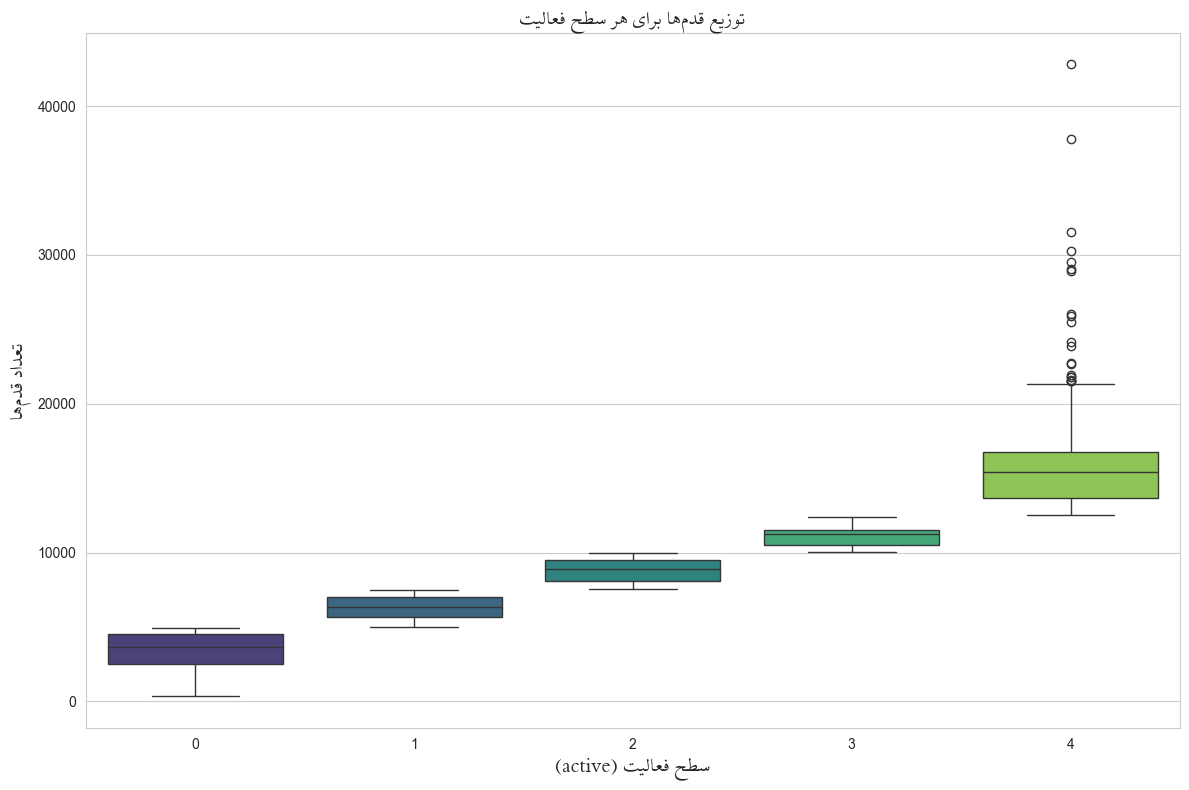

In [4]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

sns.boxplot(x='active', y='steps', data=df_MOX, palette='viridis')


xtitle = get_display(arabic_reshaper.reshape("توزیع قدم‌ها برای هر سطح فعالیت"))
plt.title(xtitle, fontproperties=persian_font)

xlabel = get_display(arabic_reshaper.reshape("سطح فعالیت (active)"))
plt.xlabel(xlabel, fontproperties=persian_font)

ylabel = get_display(arabic_reshaper.reshape("تعداد قدم‌ها"))
plt.ylabel(ylabel, fontproperties=persian_font)

plt.tight_layout()
plt.savefig('activity_steps_boxplot_MOX.png')
plt.show()

<Figure size 1800x900 with 0 Axes>

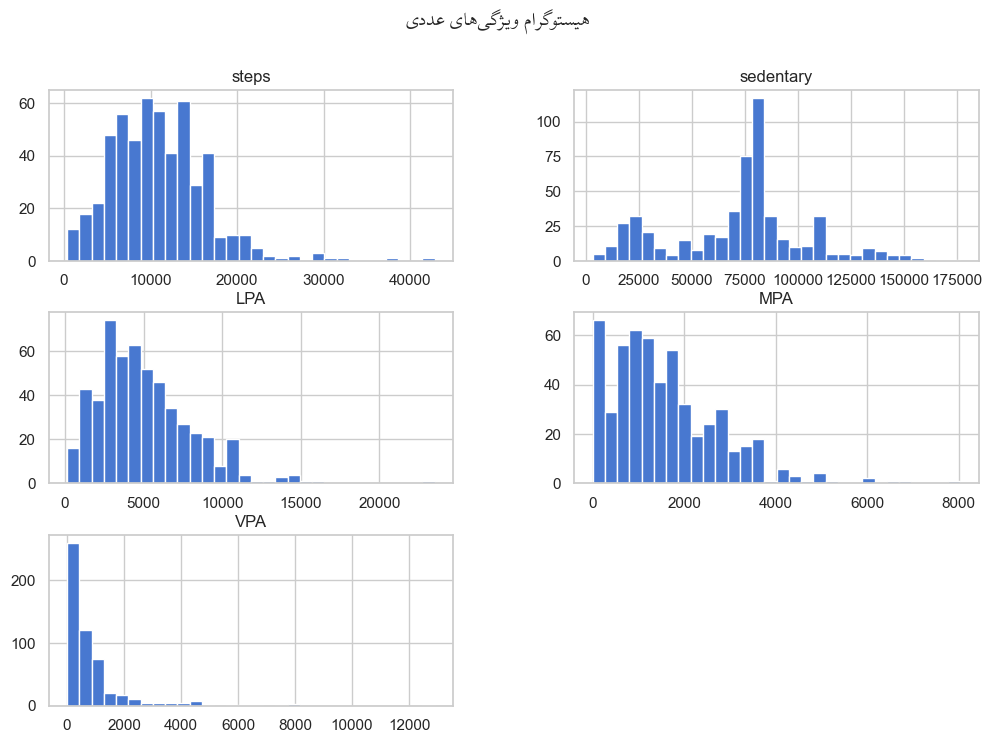

In [5]:
# Set the style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(18, 9))

# Set theme
plt.style.use("default")
sns.set_theme(style="whitegrid", palette="muted")

# 1. Histogram for numeric variables
numeric_cols = ['steps', 'sedentary', 'LPA', 'MPA', 'VPA']
df_MOX[numeric_cols].hist(bins=30, figsize=(12, 8))
suptitle = get_display(arabic_reshaper.reshape("هیستوگرام ویژگی‌های عددی"))
plt.suptitle(suptitle, fontproperties=persian_font)
plt.savefig('Histogram of Numeric Features_MOXData.png')
plt.show()

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_2404\3914210340.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_MOX, x='active', palette="Set2")


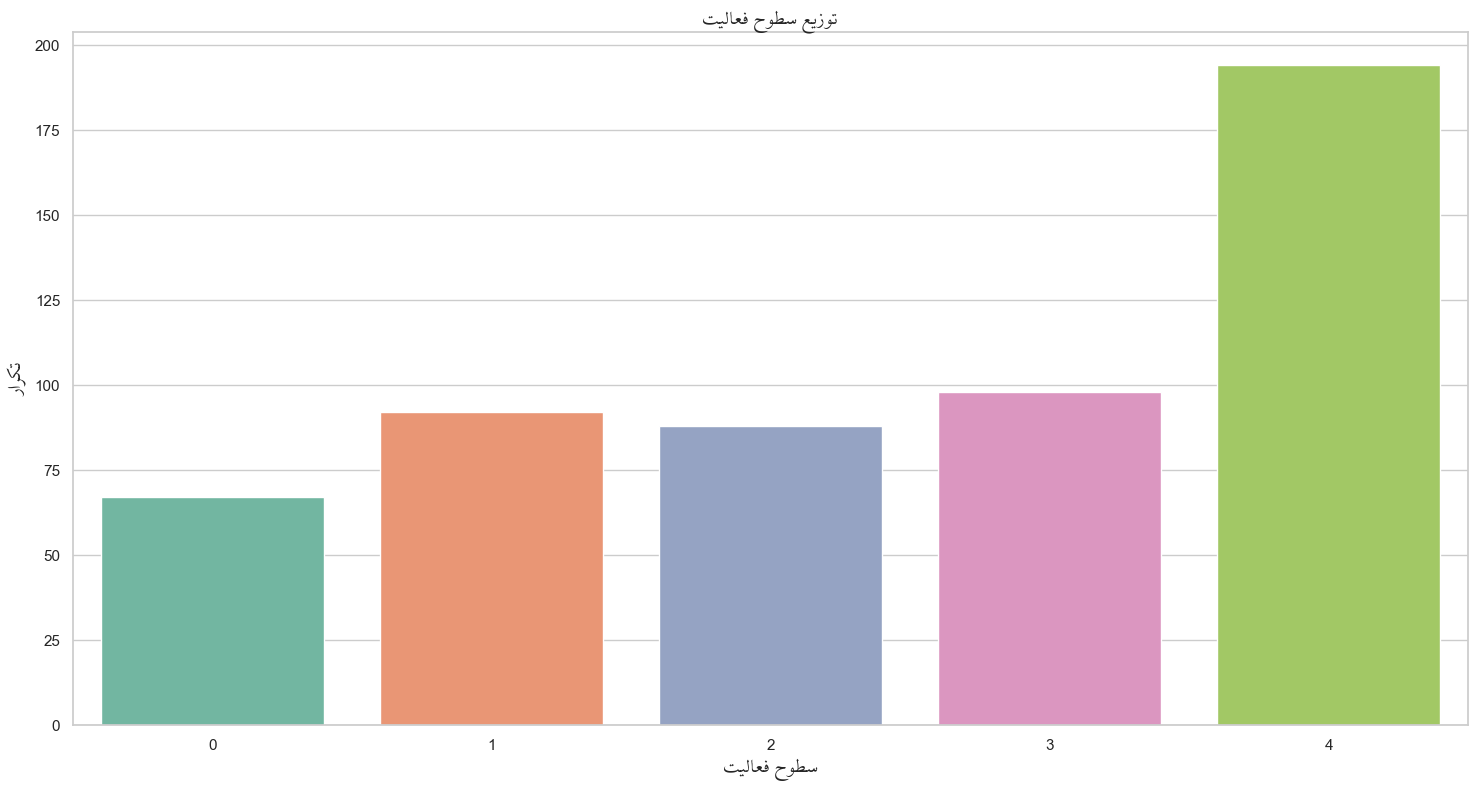

In [6]:
# Set the style of the plots
sns.set_style("whitegrid")
plt.figure(figsize=(18, 9))

sns.countplot(data=df_MOX, x='active', palette="Set2")
title = get_display(arabic_reshaper.reshape("توزیع سطوح فعالیت"))
plt.title(title, fontproperties=persian_font)
x = get_display(arabic_reshaper.reshape("سطوح فعالیت"))
plt.xlabel(x, fontproperties=persian_font)
y = get_display(arabic_reshaper.reshape("تکرار"))
plt.ylabel(y, fontproperties=persian_font)
plt.savefig('Distribution of Activity Levels_MOXData.png')
plt.show()

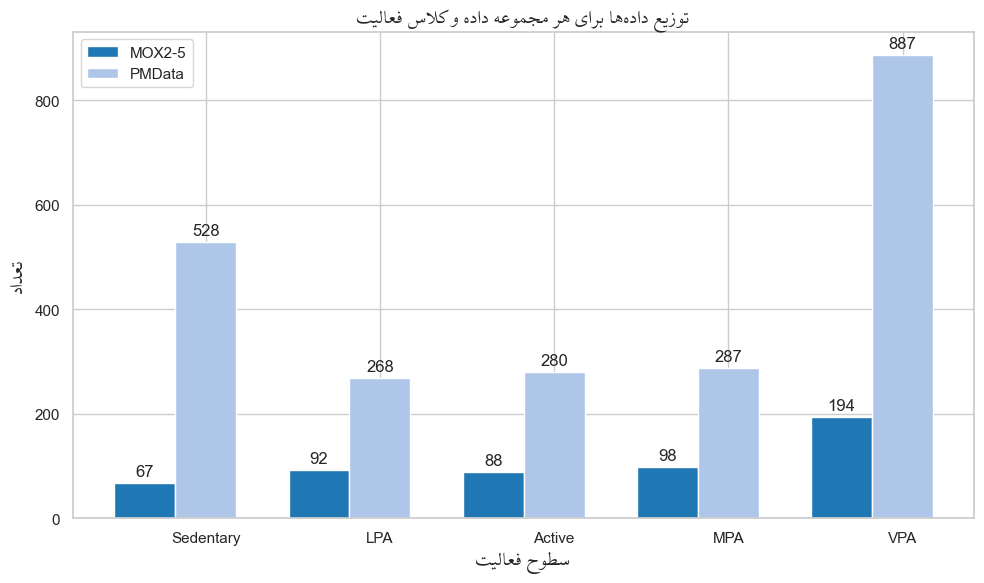

In [9]:
pm_file = "C:\\Users\\Fatemeh\\Downloads\\ploting\\PMData\\PMData_features_vector.csv"
mox_file = "C:\\Users\\Fatemeh\\Downloads\\ploting\\MOX\\MOX2_5_data_labelled.csv"

df_pm = pd.read_csv(pm_file)
df_pm["dataset"] = "PMData"

df_mox = pd.read_csv(mox_file)
df_mox["dataset"] = "MOX2-5"

df = pd.concat([df_pm, df_mox], ignore_index=True)


class_column = "active"

# نگاشت کلاس‌ها
class_labels = {
    0: "Sedentary",
    1: "LPA",
    2: "Active",
    3: "MPA",
    4: "VPA"
}

df["active"] = df[class_column].map(class_labels)


counts = df.groupby(["dataset", "active"]).size().reset_index(name="count")


classes = list(class_labels.values())
datasets = counts["dataset"].unique()
x = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
colors = ["#1f77b4", "#aec7e8"] 

for i, dataset in enumerate(datasets):
    dataset_counts = counts[counts["dataset"] == dataset].set_index("active").reindex(classes, fill_value=0)["count"]
    ax.bar(x + (i - len(datasets)/2) * width, dataset_counts, width, label=dataset, color=colors[i])

ylabel = get_display(arabic_reshaper.reshape("تعداد"))
xlabel = get_display(arabic_reshaper.reshape("سطوح فعالیت"))
ax.set_ylabel(ylabel, fontproperties=persian_font)
ax.set_xlabel(xlabel, fontproperties=persian_font)
title = get_display(arabic_reshaper.reshape("توزیع داده‌ها برای هر مجموعه داده و کلاس فعالیت"))
plt.title(title, fontproperties=persian_font)
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()


for bar in ax.containers:
    ax.bar_label(bar, padding=3)

plt.tight_layout()
plt.savefig('Data Distribution for both datasets.png')
plt.show()
